In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"E:\nichlas project/train.csv")

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
df.shape

(159571, 8)

In [30]:
x = df["comment_text"]
y = df.iloc[:,2:]

In [31]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [14]:
from tensorflow.keras.layers import TextVectorization

In [15]:
max_features = 200000

In [17]:
vectorizer = TextVectorization(max_tokens = max_features,output_sequence_length = 1800,output_mode = "int")

In [18]:
vectorizer.adapt(x.values)

In [19]:
vectorized_text = vectorizer(x.values)

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [37]:
train = dataset.take(int(len(dataset)*.8))
val = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Embedding

In [34]:
model = Sequential()
model.add(Embedding(max_features+1,32))
model.add(Bidirectional(LSTM(32,activation = "tanh")))
model.add(Dense(128,activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(6,activation = "sigmoid"))

In [35]:
model.compile(loss="BinaryCrossentropy", optimizer = "Adam")

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [38]:
history = model.fit(train,epochs=5,validation_data=val)

Epoch 1/5
7979/7979 [==============================] - 8460s 1s/step - loss: 0.0623 - val_loss: 0.0477
Epoch 2/5
7979/7979 [==============================] - 10346s 1s/step - loss: 0.0454 - val_loss: 0.0395
Epoch 3/5
7979/7979 [==============================] - 7521s 942ms/step - loss: 0.0392 - val_loss: 0.0352
Epoch 4/5
7979/7979 [==============================] - 7483s 938ms/step - loss: 0.0352 - val_loss: 0.0303
Epoch 5/5
7979/7979 [==============================] - 8562s 1s/step - loss: 0.0311 - val_loss: 0.0274


<Figure size 576x360 with 0 Axes>

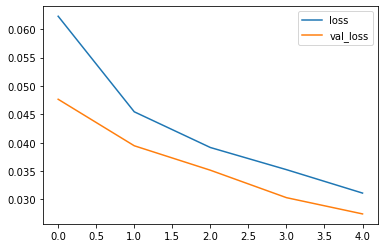

In [39]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [40]:
txt = vectorizer("fuck you")

In [42]:
res = model.predict(np.expand_dims(txt,0))

In [44]:
model.save("toxic.h5")